In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../타이타닉 data/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## How many Survived??

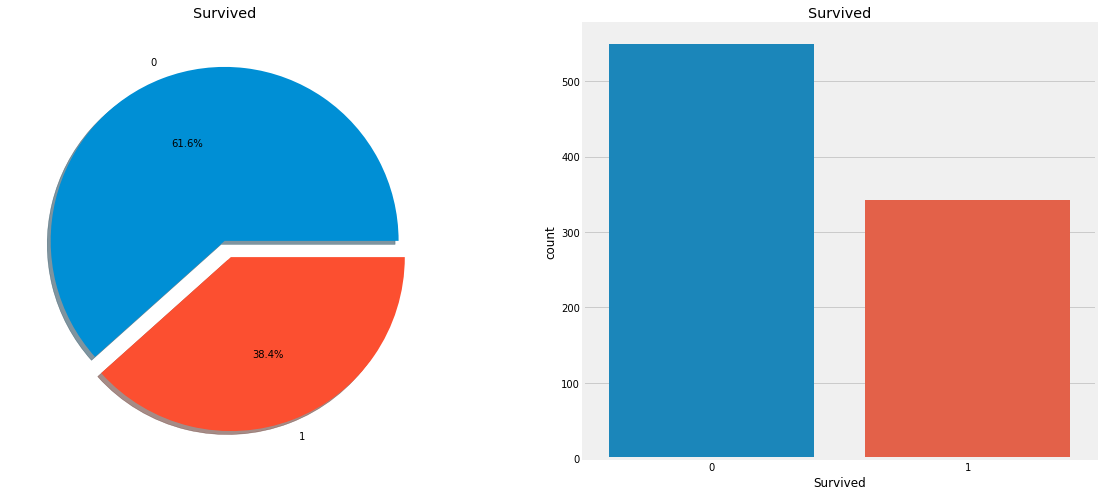

In [5]:
f,ax = plt.subplots(1,2,figsize = (18,8))
data["Survived"].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax = ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data = data, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

## Analysing The Features // Sex--> Categorical Feature

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

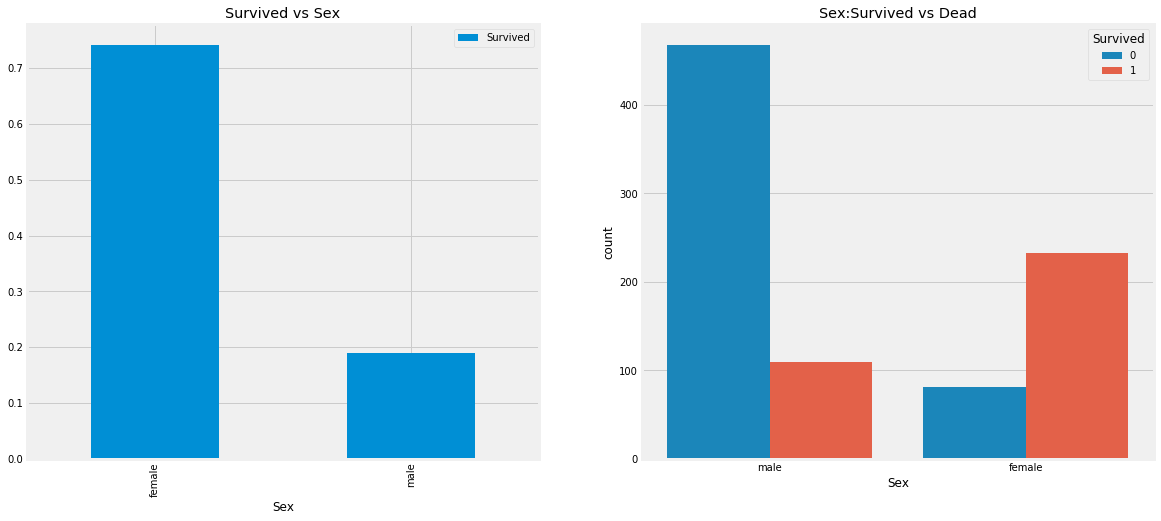

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data = data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

## Pclass -> Ordinal Feature

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


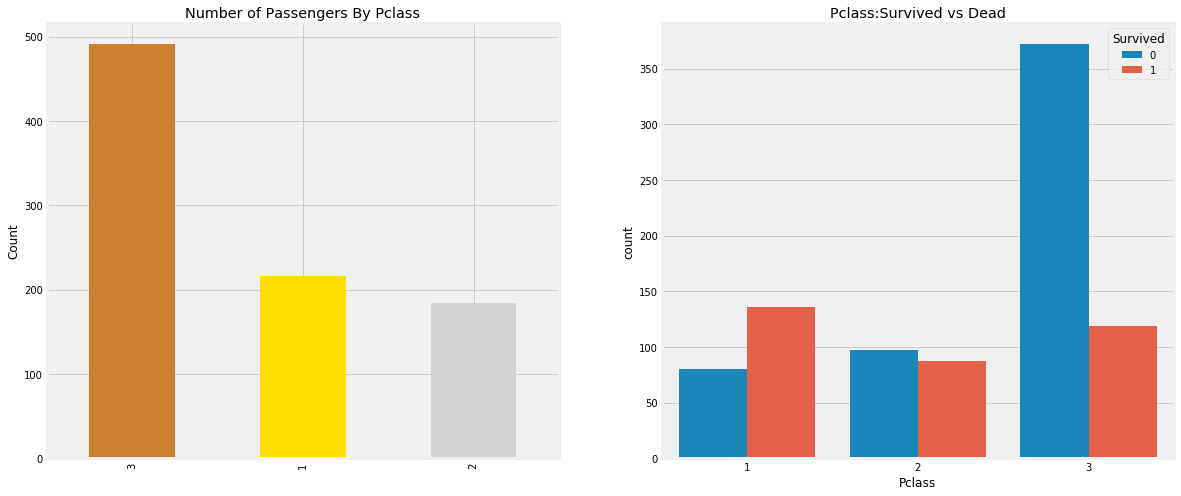

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue = 'Survived', data = data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

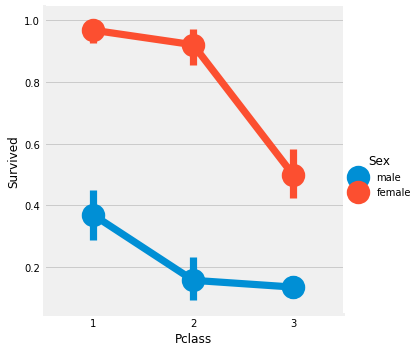

In [11]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data=data)
plt.show()

#### 남성보다 여성의 생존율이 높다 구출우선순위가 부여된것 같다

## Age--> Continous Feature

In [12]:
print('Oldeset Passenger was of:', data['Age'].max(),'Years')
print('Youngest Passenger was of:', data['Age'].min(),'Years')
print('Average Age on the ship:', data['Age'].mean(),'Years')

Oldeset Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


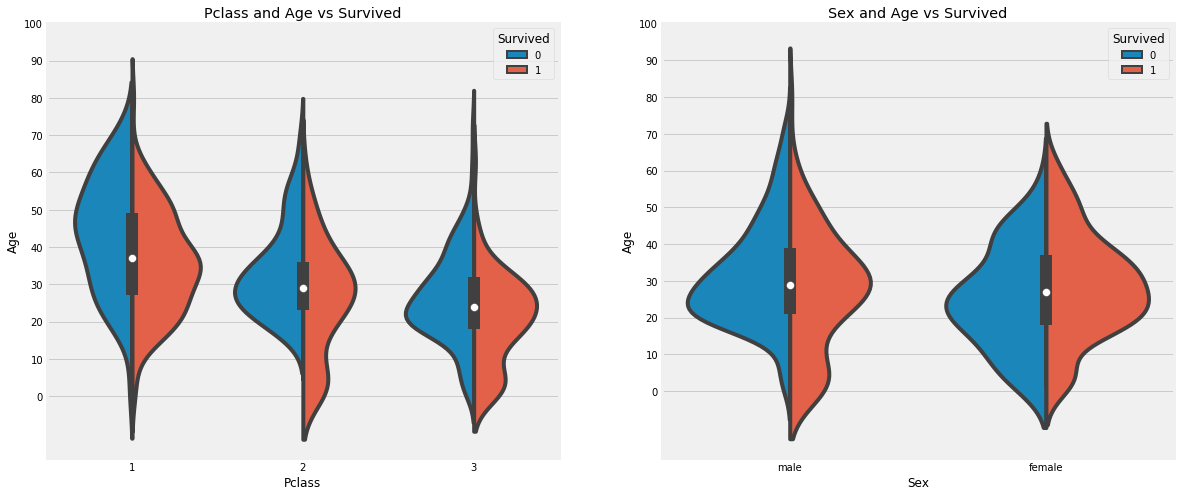

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data=data,split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### 어린이수(10세미만)는 클래스에따라 증가하고 생존율은 클래스와 상관없이 양호하다

#### 20~50세의 승객이 생존가능성이 높고 그중에서 여성이 더 높다

#### 남성의 경우 생존 확률은 나이가 증가함에 따라 감소한다

#### 하지만 Age 컬럼에 177개의 null 값이 존재하고 나이가 다른 사람들이 많다 그래서 이름 기능을 활용하여 Mr, Mrs 평균값을 각 그룹에 할당한다

In [14]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [15]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


#### Mlle이나 Mme과 같이 맞춤법이 틀린 이니셜이 Miss를 뜻하는 것이므로 다른 값으로 대체한다

In [28]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [29]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.616750
Miss      21.887097
Mr        32.739609
Mrs       35.984252
Other     45.888889
Name: Age, dtype: float64

### NaN Age 값 채우기

In [30]:
#위에서 구한 평균으로 넣기
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [31]:
data.Age.isnull().any()

False

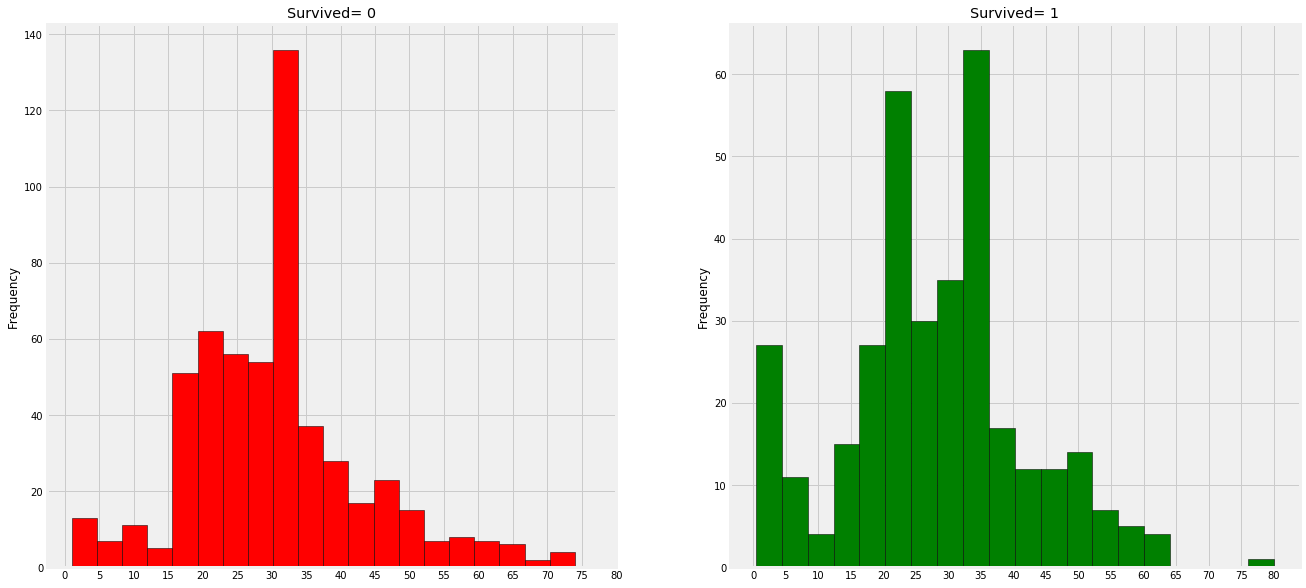

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

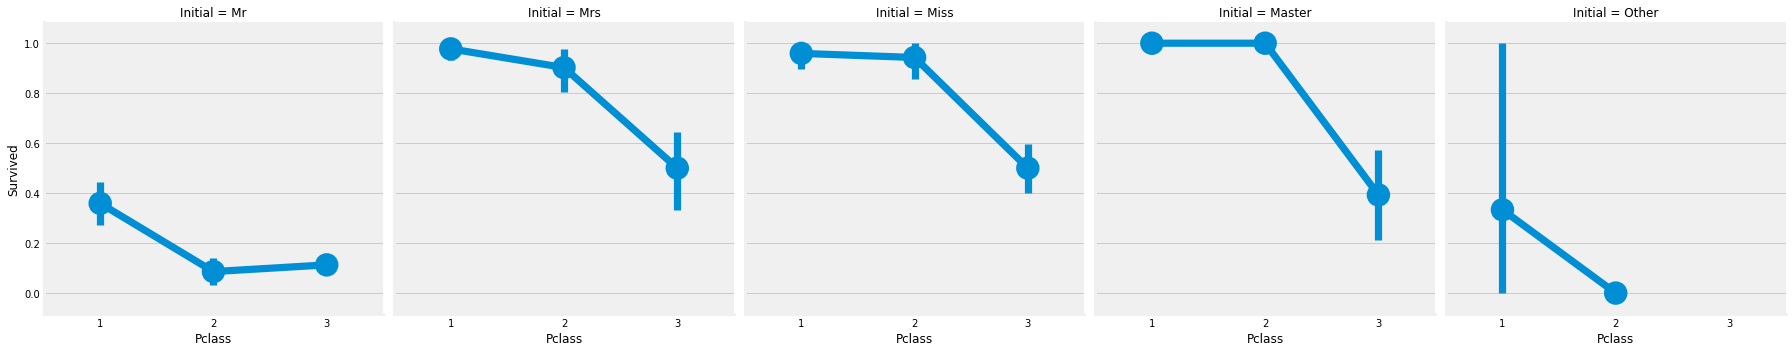

In [33]:
sns.factorplot('Pclass', 'Survived', col = 'Initial', data= data)
plt.show()

#### 여성과 아동의 경우 클래스와 상관없이 먼저였다????????????(로 해석하는게 맞나)

## Embarked--> Categorical Value

In [36]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived],
            margins=True).style.background_gradient(cmap='summer_r')

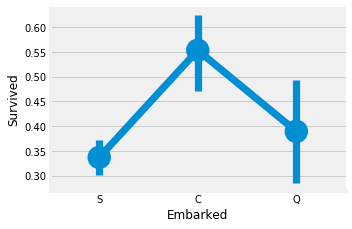

In [37]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

#### C가 생존률이 가장 높고 S가 가장낮다

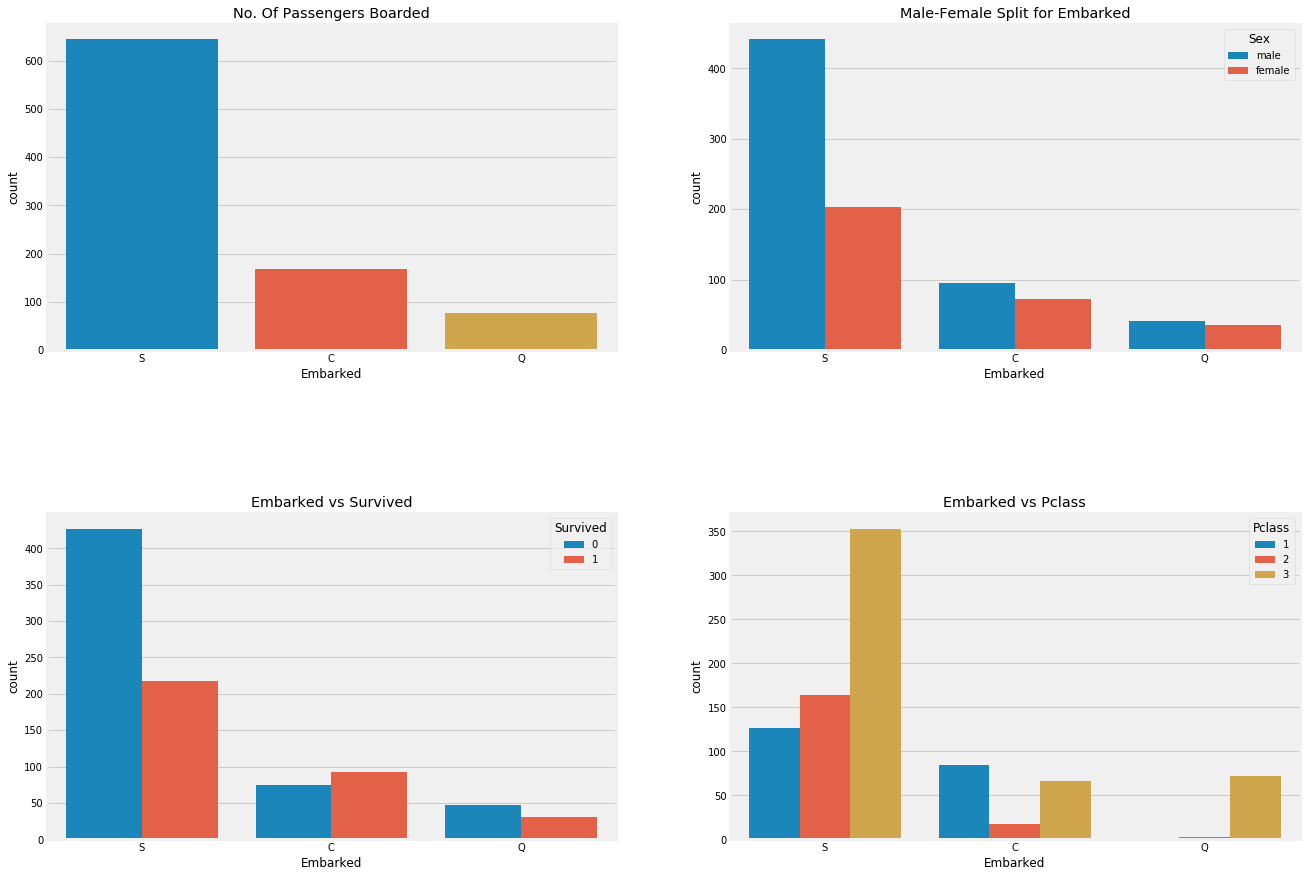

In [38]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

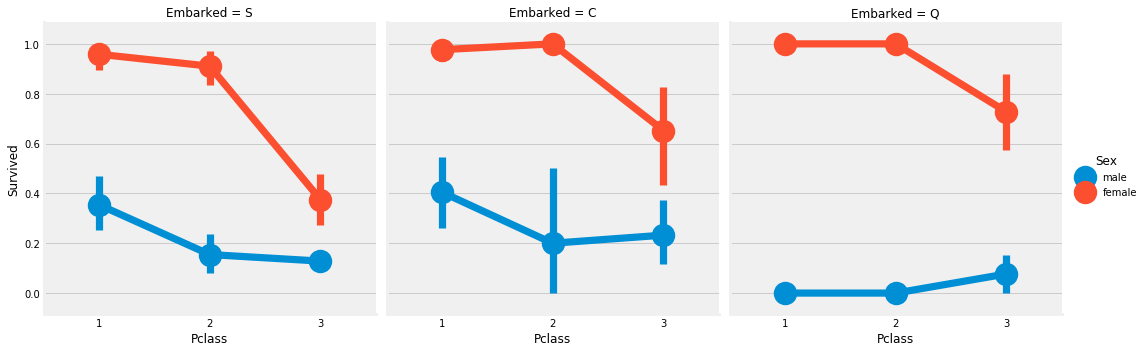

In [39]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col='Embarked', data=data)
plt.show()

In [40]:
data['Embarked'].fillna('S',inplace=True)

In [41]:
data.Embarked.isnull().any()

False

## SibSip-->Discrete Feature 

### 사람이 혼자인지 가족과 함께있는지 확인

In [43]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


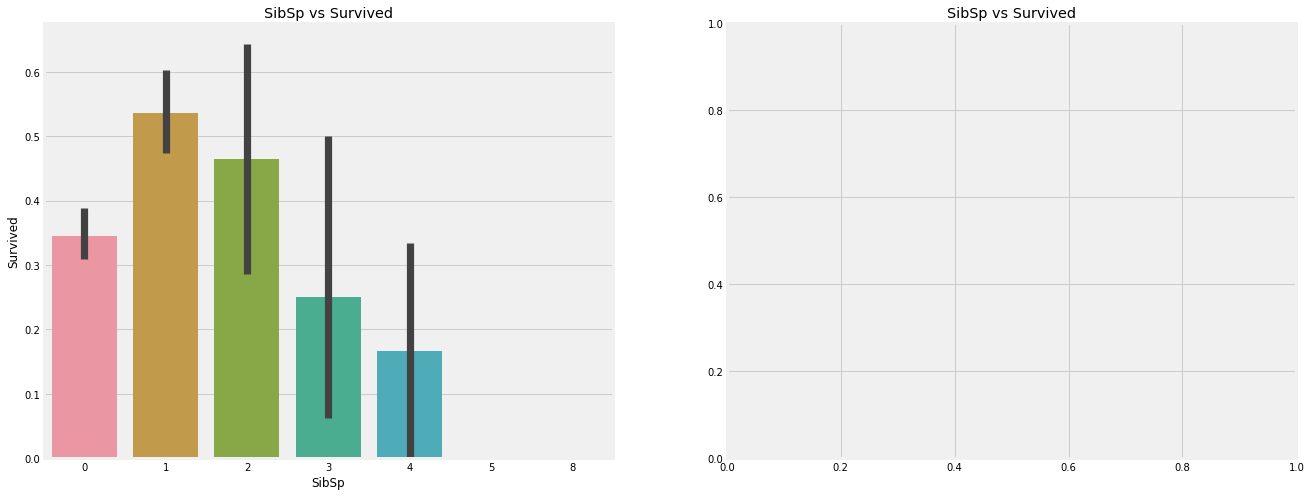

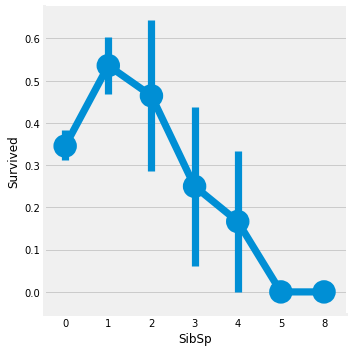

In [59]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.show()

In [60]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


#### 그래프를 보면 승객중에 형제 자매 없이 혼자 탑승하는 경우 생존률이 34.5%이고 형제 수가 증가 하면 그래프가 감소하는 것을 확인할수가 있다. 즉 가족이 있으면 내가 먼저가 아니고 가족을 먼저 구하려고 노력할 것이기 때문이다. 그리고 크로스 탭은 SibSp>3인 대가족인 경우 3클래스에  있음을 보여주고, 모든 대가족이 죽었다는 것을 볼수있다.

##  Parch

In [61]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


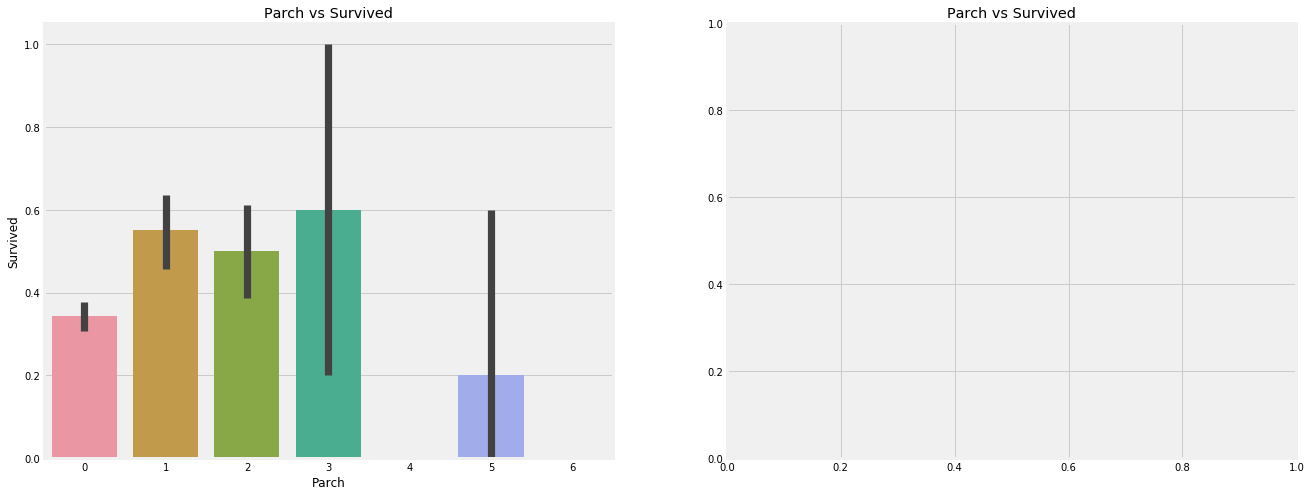

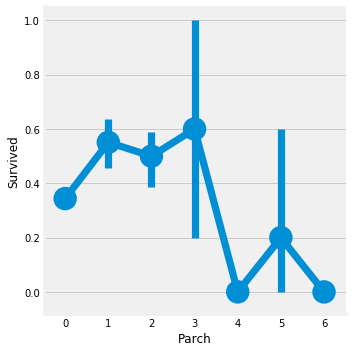

In [64]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

####  여기에서도 결과는 비슷하다 

## Fare--> Continous Feature

In [65]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


In [ ]:
f,ax